
# Milestone 2: Data Analysis and Visualization - Sales Forecasting

**Objective:** Perform deeper data analysis and visualize relationships within the cleaned sales data to uncover trends, seasonality, and correlations relevant for forecasting.

## 1. Setup and Load Data


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Set plotting style
sns.set_theme(style="whitegrid")

In [11]:
file_path = 'cleaned_retail_data_milestone1.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])

In [12]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

## 2. Data Analysis

### 2.1 Time Series Analysis: Trends and Seasonality

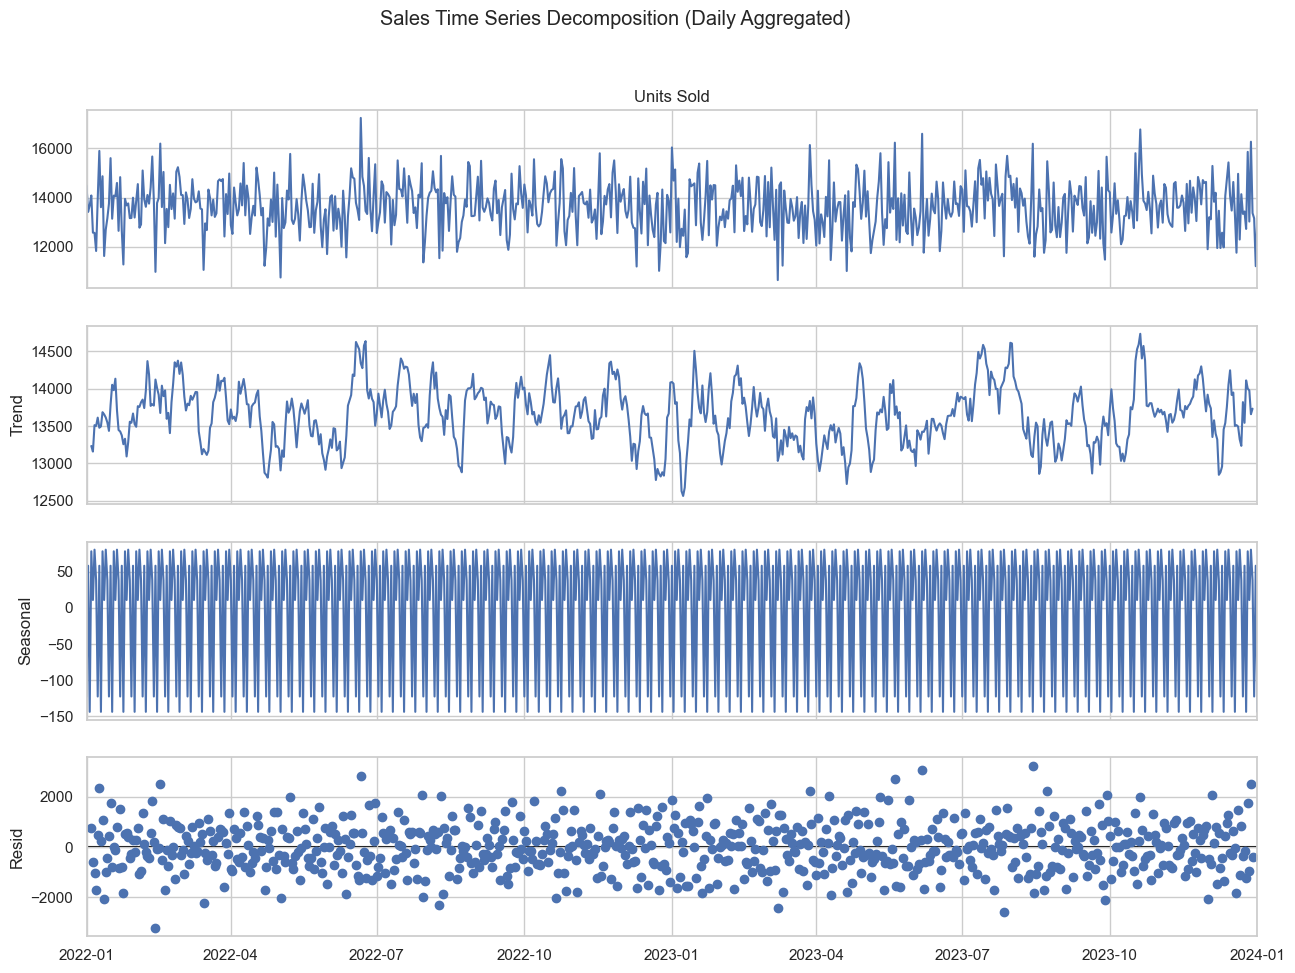

In [13]:
# Aggregate daily sales across all stores/products
daily_sales_agg = df['Units Sold'].resample('D').sum()


# If less data or different seasonality.
decomposition = seasonal_decompose(daily_sales_agg, model='additive', period=7)

fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.suptitle('Sales Time Series Decomposition (Daily Aggregated)', y=1.02)
plt.show()

#### **Observation:**

1. **Observed Component**:
   - The top panel shows the observed daily sales data, which exhibits significant variability and fluctuations. The sales range between approximately 12,500 and 17,500 units, indicating a dynamic sales environment with frequent changes.

2. **Trend Component**:
   - The second panel displays the trend component, which shows a gradual decline in sales from early 2022 to mid-2023, followed by a slight upward movement towards the end of 2023. This suggests a long-term downward trend in sales, with a potential recovery starting in late 2023.

3. **Seasonal Component**:
   - The third panel illustrates the seasonal component, which captures regular patterns and cycles in the data. The seasonal fluctuations appear to be relatively consistent over time, indicating recurring patterns in sales that may be influenced by external factors such as holidays or promotions.

4. **Residual Component**:
   - The bottom panel shows the residuals, which represent the irregular or random fluctuations not explained by the trend or seasonal components. The residuals are centered around zero, with a few outliers, indicating that most of the variability in sales is captured by the trend and seasonal components.

Overall, the decomposition reveals a declining trend in sales with consistent seasonal patterns and some unexplained variability. The slight upward movement in the trend towards the end of 2023 may indicate a potential recovery or change in sales dynamics.

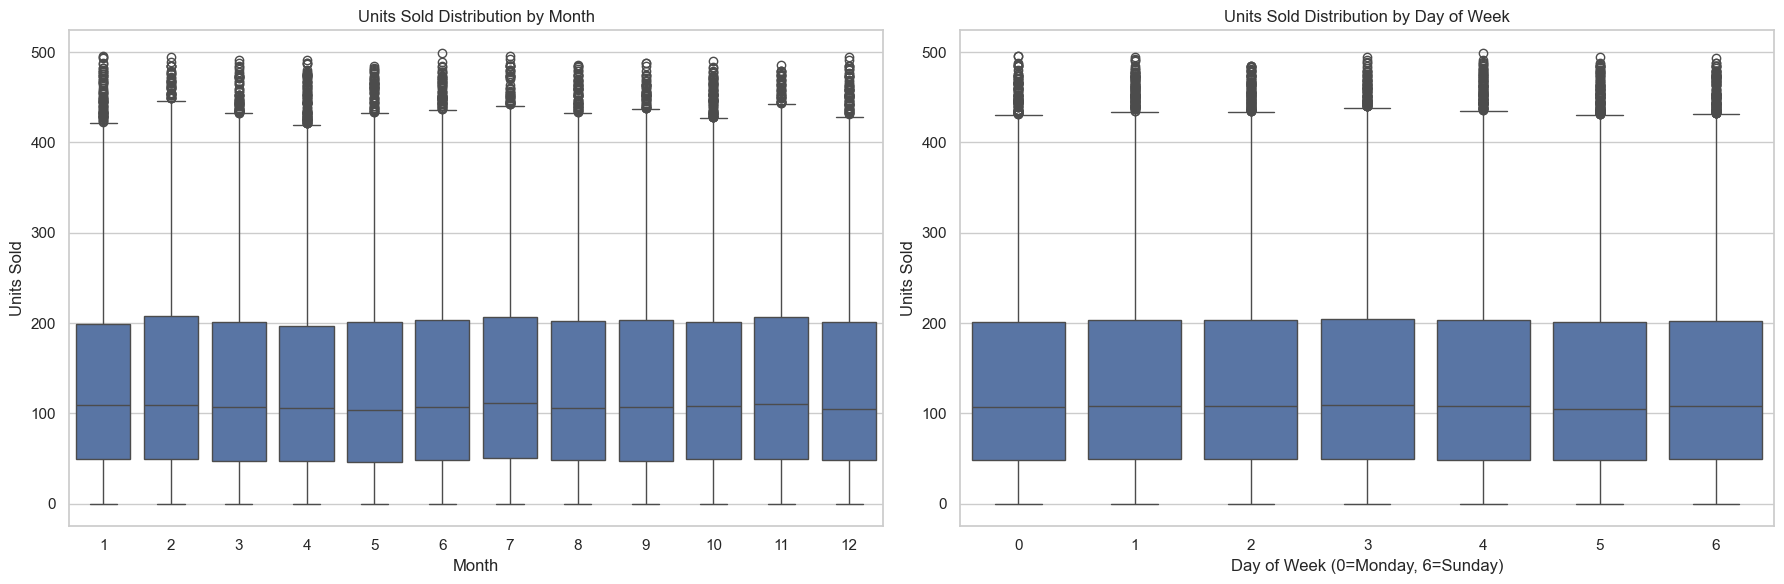

In [14]:
# Analyze seasonality by month and day of the week
df['Month'] = df.index.month
df['DayOfWeek'] = df.index.dayofweek # Monday=0, Sunday=6

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Monthly Sales Pattern
sns.boxplot(x='Month', y='Units Sold', data=df, ax=axes[0])
axes[0].set_title('Units Sold Distribution by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Units Sold')

# Day of Week Sales Pattern
sns.boxplot(x='DayOfWeek', y='Units Sold', data=df, ax=axes[1])
axes[1].set_title('Units Sold Distribution by Day of Week')
axes[1].set_xlabel('Day of Week (0=Monday, 6=Sunday)')
axes[1].set_ylabel('Units Sold')

plt.tight_layout()
plt.show()

#### **Observation:**

1. **Units Sold Distribution by Month**:
   - The box plots for each month show a similar distribution of units sold, with the median and interquartile range (IQR) remaining relatively consistent throughout the year.
   - There are numerous outliers above the upper whisker for each month, indicating occasional high sales days that deviate from the typical sales pattern.
   - The overall distribution does not show significant variation from month to month, suggesting that sales are relatively stable across the year without pronounced seasonal effects.

2. **Units Sold Distribution by Day of Week**:
   - The box plots for each day of the week also show a consistent distribution of units sold, with similar medians and IQRs across all days.
   - Like the monthly distribution, there are outliers present for each day, indicating sporadic high sales days.
   - The distribution does not exhibit significant differences between weekdays and weekends, suggesting that sales are evenly distributed throughout the week without a strong day-of-week effect.

Overall, these box plots suggest that the distribution of units sold is stable across both months and days of the week, with occasional outliers representing high sales days. There are no significant seasonal or weekly patterns evident in the data.

## 3. Data Visualization

In [15]:
monthly_sales_interactive = df['Units Sold'].resample('ME').sum().reset_index() # Plotly prefers df format
fig_monthly_interactive = px.line(monthly_sales_interactive, x='Date', y='Units Sold',
                                  title='Monthly Units Sold Over Time',)
fig_monthly_interactive.update_layout(xaxis_title='Date', yaxis_title='Total Units Sold')
fig_monthly_interactive.show()

#### **Observations**

1. **Overall Stability**:
   - The plot shows that the total units sold per month remain relatively stable over the period from mid-2021 to late 2023, with values hovering around 400,000 units. This indicates a consistent sales performance on a monthly basis.

2. **Minor Fluctuations**:
   - There are minor fluctuations in the total units sold each month, with some months experiencing slight increases or decreases. These variations do not appear to follow a specific seasonal pattern and are relatively small in magnitude.

3. **Significant Drop at the End**:
   - There is a noticeable and significant drop in total units sold towards the end of the observed period, around early 2024. This sharp decline could be due to incomplete data for that month, a reporting error, or an actual decrease in sales activity.

4. **Lack of Seasonal Trends**:
   - The graph does not show any clear seasonal trends or cyclical patterns, suggesting that sales are not heavily influenced by seasonal factors.

Overall, the interactive plot suggests a consistent sales environment over the observed period, with a sudden and unexplained drop in the final months. Further investigation may be needed to understand the cause of this decline.

In [16]:
df_sample = df.sample(n=min(5000, len(df)), random_state=42)

fig_scatter_interactive = px.scatter(df_sample, x='Price', y='Units Sold', color='Category',
                                     hover_data=['Product ID', 'Store ID'],
                                     title='Price vs. Units Sold by Category',
                                     labels={'Units Sold': 'Units Sold', 'Price': 'Price ($)'})
fig_scatter_interactive.update_layout(xaxis_title='Product Price', yaxis_title='Units Sold')
fig_scatter_interactive.show()

#### **Observations**

1. **Distribution Across Price Range**:
   - The scatter plot shows a wide distribution of units sold across the entire price range from $0 to $100. This indicates that products at all price points are being sold, with no clear concentration at any specific price level.

2. **Units Sold Variability**:
   - Units sold vary significantly across different price points, with values ranging from 0 to 500 units. This suggests that the number of units sold is not strongly dependent on the price alone.

3. **Category Representation**:
   - The plot is color-coded by category, showing a mix of categories (Electronics, Toys, Clothing, Groceries, Furniture) across the price range. Each category appears to be represented throughout the price spectrum, indicating that all categories have products at various price points.

4. **Lack of Clear Pattern**:
   - There is no obvious pattern or trend between price and units sold, suggesting that other factors beyond price and category may be influencing sales. The data points are scattered without a clear correlation.

5. **Category-Specific Observations**:
   - While all categories are present across the price range, some categories may have more data points at certain price levels, indicating potential differences in pricing strategies or product offerings among categories.

Overall, the scatter plot suggests that units sold are distributed across a wide range of prices and categories, with no strong linear relationship between price and sales volume. This highlights the complexity of sales dynamics, where multiple factors may be at play.

In [17]:
fig_box_region = px.box(df, x='Region', y='Units Sold',
                        title='Units Sold Distribution by Region',
                        labels={'Units Sold': 'Units Sold', 'Region': 'Store Region'})
fig_box_region.update_layout(xaxis_title='Store Region', yaxis_title='Units Sold')
fig_box_region.show()

#### **Observation:**

1. **Similar Distribution Across Regions**:
   - The box plots for each region (North, South, West, East) show a similar distribution of units sold, with comparable medians and interquartile ranges (IQRs). This suggests that sales performance is relatively consistent across different regions.

2. **Median Units Sold**:
   - The median units sold for each region are approximately the same, indicating that the central tendency of sales is similar regardless of the region.

3. **Variability in Sales**:
   - The IQRs, represented by the boxes, are also similar across regions, indicating that the variability in sales is consistent. This suggests that the spread of sales data is uniform across different geographical areas.

4. **Presence of Outliers**:
   - Each region has outliers above the upper whisker, representing days with exceptionally high sales. These outliers are consistent across regions, indicating that all regions experience occasional spikes in sales.

5. **Overall Sales Range**:
   - The overall range of units sold, from the minimum to the maximum, is similar across regions, further supporting the observation of uniform sales distribution.

Overall, the box plot suggests that the distribution of units sold is consistent across all regions, with similar medians, variability, and occasional high sales days. This indicates a balanced sales performance across different geographical areas.

In [18]:
fig_box_category = px.box(df, x='Category', y='Units Sold',
                          title='Units Sold Distribution by Product Category',
                          labels={'Units Sold': 'Units Sold', 'Category': 'Product Category'})
fig_box_category.update_layout(xaxis_title='Product Category', yaxis_title='Units Sold')
fig_box_category.show()

#### **Observations**

1. **Similar Distribution Across Categories**:
   - The box plots for each product category (Groceries, Toys, Electronics, Furniture, Clothing) show a similar distribution of units sold, with comparable medians and interquartile ranges (IQRs). This suggests that sales performance is relatively consistent across different product categories.

2. **Median Units Sold**:
   - The median units sold for each category are approximately the same, indicating that the central tendency of sales is similar regardless of the product category.

3. **Variability in Sales**:
   - The IQRs, represented by the boxes, are also similar across categories, indicating that the variability in sales is consistent. This suggests that the spread of sales data is uniform across different product types.

4. **Presence of Outliers**:
   - Each category has outliers above the upper whisker, representing days with exceptionally high sales. These outliers are consistent across categories, indicating that all product types experience occasional spikes in sales.

5. **Overall Sales Range**:
   - The overall range of units sold, from the minimum to the maximum, is similar across categories, further supporting the observation of uniform sales distribution.

Overall, the box plot suggests that the distribution of units sold is consistent across all product categories, with similar medians, variability, and occasional high sales days. This indicates a balanced sales performance across different types of products.